In [13]:
import pandas as pd
df1 = pd.DataFrame({
                    "Channel":['Fox','Fox','Discovery','Discovery','Discovery','2+2'],
                    "Genre":['Drama','Drama', 'Documentary', 'Documentary', 'Documentary', 'Action'],
                    "Film":['Suits','Bones','Salvage Hunters','Gold Rush','Chasing Ocean Giants','Die Hard'],
                    "Durations":[65, 59, 60, 75, 59, 98],
                    }).set_index(['Channel','Genre'])


df2 = pd.DataFrame({
        "Actor":['Sarah Rafferty','Emily Deschanel','Drew Pritchard','Parker Schnabel','Patrick Dykstra','Bruce Willis'],
        "Height":[175, 175, 173, 180, 186, 182],
        "Weight":[55, 65, 75, 80, 82, 87],
        "Birthday":[1979, 1980, 1970, 1989, 1989, 1955],
        "Show":["Suits", "Bones", "Salvage Hunters", "Gold Rush", "Chasing Ocean Giants", "Die Hard"]
        })
df1



Film  Durations
Channel   Genre                                       
Fox       Drama                       Suits         65
          Drama                       Bones         59
Discovery Documentary       Salvage Hunters         60
          Documentary             Gold Rush         75
          Documentary  Chasing Ocean Giants         59
2+2       Action                   Die Hard         98

In [14]:
df2

,Actor,Height,Weight,Birthday,Show
0,Sarah Rafferty,175,55,1979,Suits
1,Emily Deschanel,175,65,1980,Bones
2,Drew Pritchard,173,75,1970,Salvage Hunters
3,Parker Schnabel,180,80,1989,Gold Rush
4,Patrick Dykstra,186,82,1989,Chasing Ocean Giants
5,Bruce Willis,182,87,1955,Die Hard


In [45]:
df3 = df1.join(df2.set_index('Show'), on='Film')
df3.set_index('Actor', append=True)
df3

Film  Durations            Actor  \
Channel   Genre                                                           
Fox       Drama                       Suits         65   Sarah Rafferty   
          Drama                       Bones         59  Emily Deschanel   
Discovery Documentary       Salvage Hunters         60   Drew Pritchard   
          Documentary             Gold Rush         75  Parker Schnabel   
          Documentary  Chasing Ocean Giants         59  Patrick Dykstra   
2+2       Action                   Die Hard         98     Bruce Willis   

                       Height  Weight  Birthday  
Channel   Genre                                  
Fox       Drama           175      55      1979  
          Drama           175      65      1980  
Discovery Documentary     173      75      1970  
          Documentary     180      80      1989  
          Documentary     186      82      1989  
2+2       Action          182      87      1955

In [28]:
max_lenght=df3.sum(level='Genre')
max_lenght.sort_values(by='Durations',ascending=False,inplace=True)
max_lenght.drop(['Weight', 'Height', 'Birthday'], axis='columns', inplace=True)
res = max_lenght.head(1)
print(res)

             Durations
Genre                 
Documentary        194


In [31]:
max_width=df3.sort_values(by='Height',ascending=False)
max_width=max_width.head(2)
max_width=max_width.tail(1)
max_width

,,Film,Durations,Actor,Height,Weight,Birthday
Channel,Genre,,,,,,
2+2,Action,Die Hard,98,Bruce Willis,182,87,1955


In [44]:
df3['Millennials'] = (df3['Birthday'] > 1981).astype(int)
df3

Film  Durations            Actor  \
Channel   Genre                                                           
Fox       Drama                       Suits         65   Sarah Rafferty   
          Drama                       Bones         59  Emily Deschanel   
Discovery Documentary       Salvage Hunters         60   Drew Pritchard   
          Documentary             Gold Rush         75  Parker Schnabel   
          Documentary  Chasing Ocean Giants         59  Patrick Dykstra   
2+2       Action                   Die Hard         98     Bruce Willis   

                       Height  Weight  Birthday  Millennials  
Channel   Genre                                               
Fox       Drama           175      55      1979            0  
          Drama           175      65      1980            0  
Discovery Documentary     173      75      1970            0  
          Documentary     180      80      1989            1  
          Documentary     186      82      1989            1  
2+2       Action          182      87      1955            0

In [53]:
df3['Result'] = df3['Height']/df3['Weight']
average=df3.Result.mean()
only_lesser=df3[df3['Result']<average]
only_lesser

Film  Durations            Actor  \
Channel   Genre                                                           
Discovery Documentary       Salvage Hunters         60   Drew Pritchard   
          Documentary             Gold Rush         75  Parker Schnabel   
          Documentary  Chasing Ocean Giants         59  Patrick Dykstra   
2+2       Action                   Die Hard         98     Bruce Willis   

                       Height  Weight  Birthday    Result  
Channel   Genre                                            
Discovery Documentary     173      75      1970  2.306667  
          Documentary     180      80      1989  2.250000  
          Documentary     186      82      1989  2.268293  
2+2       Action          182      87      1955  2.091954

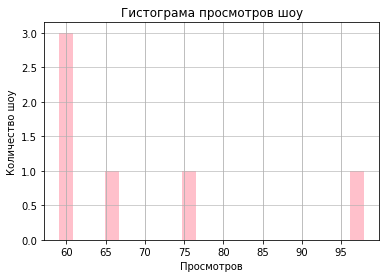

In [61]:
# 8 задание
import matplotlib.pyplot as plt
import pandas as pd

size, scale = 1000, 10
ages = df3['Durations']

ages.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='pink')
plt.title('Гистограма просмотров шоу')
plt.xlabel('Просмотров')
plt.ylabel('Количество шоу')
plt.grid(axis='y', alpha=0.75)

Name  Age  Can Swim  Weight   Food   Kg  Cost_per_kg  \
Kind Cage                                                           
Bear 4     Dobrik    5      True   290.0   Meat  3.0          100   
     4     Dobrik    5      True   290.0  Honey  0.5          120   
     3      Sonya    7      True   315.0   Meat  3.0          100   
     3      Sonya    7      True   315.0  Honey  0.5          120   

           Cost_per_day  
Kind Cage                
Bear 4            300.0  
     4             60.0  
     3            300.0  
     3             60.0

           Durations    Result
Channel                       
Discovery        194  6.824959
